In [1]:
import numpy as np
import os
from PIL import Image

In [4]:
arr=np.zeros((4408*5113,4,5),dtype=np.int8)

with open("./4sd/T3/Singh4_G4U1_Dbl.bin") as f:
    temp1=np.fromfile(f,dtype=np.int8)
    arr[:,:,0]=temp1.reshape(4408*5113,4)

with open("./fd/T3/Freeman_Dbl.bin") as f:
    temp2=np.fromfile(f,dtype=np.int8)
    arr[:,:,1]=temp2.reshape(4408*5113,4)

with open("./i6sd/T3/Singh_i6SD_Dbl.bin") as f:
    temp3=np.fromfile(f,dtype=np.int8)
    arr[:,:,2]=temp3.reshape(4408*5113,4)

with open("./VZ3/T3/VanZyl3_Dbl.bin") as f:
    temp4=np.fromfile(f,dtype=np.int8)
    arr[:,:,3]=temp4.reshape(4408*5113,4)

with open("./yama3/T3/Yamaguchi4_Y4O_Dbl.bin") as f:
    temp5=np.fromfile(f,dtype=np.int8)
    arr[:,:,4]=temp5.reshape(4408*5113,4)


arr=arr.reshape(4408*5113,5*4)
arr.shape

(22538104, 20)

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=9,random_state=0,n_init="auto").fit(arr)

C:\Users\saiki\AppData\Local\Temp\ipykernel_17052\520982126.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=plt.cm.get_cmap('Set1',9)


(4408, 5113, 4)


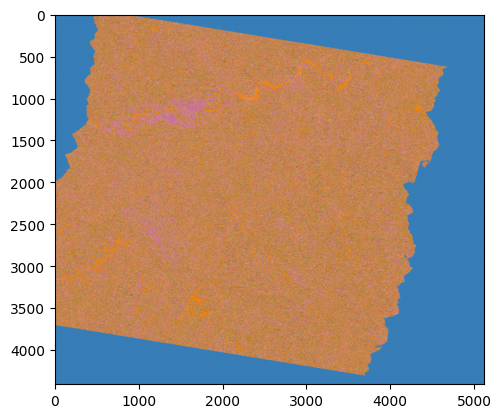

In [8]:
import matplotlib.pyplot as plt


data=kmeans.labels_
#print(data.shape)
data=data.reshape(4408,5113)




cmp=plt.cm.get_cmap('Set1',9)
colored_image=cmp(data/9)
print(colored_image.shape)
plt.imshow(colored_image)
#plt.colorbar()  # Add a colorbar for reference

plt.savefig('./plots/fig1.png')

In [14]:
import pickle

with open("processed_features.pkl",'wb') as file:
    pickle.dump(arr,file)

with open('kmeans_labels.pkl','wb') as file:
    pickle.dump(kmeans.labels_,file)

In [12]:
import geopandas as gpd

shp_file='./training/training_points.shp'

gdf=gpd.read_file(shp_file)
gdf

,id,class,foresttype,geometry
0,1,0,pine,POINT (78.74761 30.15255)


In [41]:
with open("../4sd/T3/Singh4_G4U1_Dbl_dB.bmp") as f:
    temp=np.fromfile(f,dtype=np.int8)

temp=temp.reshape(4408,5113)
image=Image.fromarray(temp.astype('uint8'))
image.show()

ValueError: cannot reshape array of size 22552406 into shape (4408,5113)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

original_image=temp1
k=9
data=kmeans.labels_
data=data.reshape(4408,5113)

cmap = plt.cm.get_cmap('viridis', k)  # 'viridis' is just an example colormap, you can choose any other colormap
cmap = cmap(np.arange(k))[:, :3]

# Create an empty 3D array for the colored image
colored_image = np.zeros_like(original_image, dtype=np.float32)

# Normalize cluster labels to [0, 1] for colormap mapping
normalized_labels = data / (k - 1)  # Assuming k is the number of clusters

# Assign colors to clusters based on normalized cluster labels
for cluster_label in range(k):
    cluster_mask = (normalized_labels == cluster_label / (k - 1))
    colored_image[cluster_mask] = cmap[cluster_label]  # Extract RGB values from the colormap

# Display the original image and the clustered annotations
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_image)
plt.title('Clustered Annotations')
plt.axis('off')

plt.show()


C:\Users\saiki\AppData\Local\Temp\ipykernel_776\3074643897.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', k)  # 'viridis' is just an example colormap, you can choose any other colormap


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [121]:
arr=[]

for (root,dirs,files) in os.walk("../plosar_convert/T3/"):
    for file in files:
        if file.endswith('.bin') and file.startswith("T"):
            print(file)
            with open("../plosar_convert/T3/"+file,"rb") as f:
                temp=np.fromfile(f,dtype=np.int8)
                sz=(int) (temp.shape[0]/4)
                # temp=np.reshape(temp,(sz,4))
                arr.append(temp)

arr=np.array(arr)
arr=arr.T
arr=np.reshape(arr,(sz,36))
arr.shape

T11.bin
T12_imag.bin
T12_real.bin
T13_imag.bin
T13_real.bin
T22.bin
T23_imag.bin
T23_real.bin
T33.bin


(22538104, 36)

In [122]:
#arr=np.array([[1,0,1],[3,2,1]])
arr[arr!=0].shape

(557480879,)

In [123]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=9,random_state=0,n_init="auto").fit(arr)

In [126]:
data=kmeans.labels_
data[data==4].shape

(1933246,)

In [26]:
with open("../plosar_convert/T3/mask_valid_pixels.bin","rb") as f:
    temp=np.fromfile(f,dtype=np.int8)

temp.shape

(90152416,)

In [69]:
im=Image.open("../plosar_convert/T3/PauliRGB.bmp")
#im.show()

imarray=np.array(im)
imarray.shape

(4408, 5113, 3)

In [101]:
data=kmeans.labels_
data[data==0]=255
data[data==1]=63
data[]
data=data.reshape(4408,5113)
image=Image.fromarray(data.astype('uint8'))
image.show()

C:\Users\saiki\AppData\Local\Temp\ipykernel_16600\1820696749.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=plt.cm.get_cmap('viridis',9)


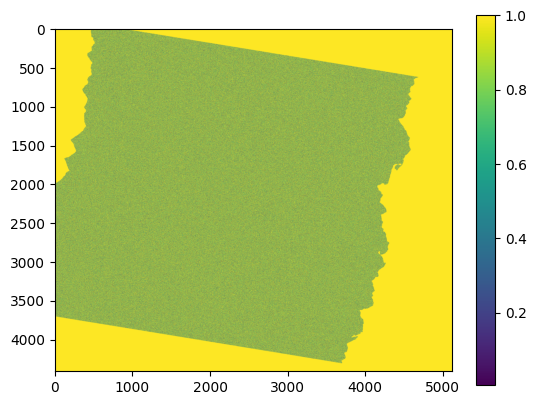

In [136]:
import matplotlib.pyplot as plt


data=kmeans.labels_
data=data.reshape(4408,5113)

cmp=plt.cm.get_cmap('viridis',9)
colored_image=cmp(data/9)

plt.imshow(colored_image)
plt.colorbar()  # Add a colorbar for reference
plt.show()